# Refazendo P1 - DSP

In [2]:
import DSP
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt


# 1) 

$$
y[n] = x^2[n+1]
\newline
n_0 = n + 4 \rightarrow y[n_0] = x^2[n_0+1]
$$
Para que o sistema seja invariante no tempo, $y[n_0] = x^2[n+5]$
$$
y[n_0] = x^2[n_0 + 1]
\newline
y[n_0] = x^2[(n + 4) + 1]
\newline
y[n_0] = x^2[n+5]
\newline
y[n_0] = y[n+4]
$$
Portanto, o sistema é invariante no tempo

In [27]:
# y[n] = x^2[n+1]
n = np.arange(-10, 11)
x = 100*np.random.rand(n.size)-50 # Valores entre [-50; 50)
nx = n+1
y = x**2 # Primeiro valor de y
s = [y, x, n] # Primeiro sinal, com saída, entrada e vetor n
##
shift = np.random.randint(-10, 10) # Valor aleatório para frente entre [10; -10)
nx1 = nx+shift
y1 = x**2 # Shift em n não impacta valor de 'x'
s1 = [y1, x, n]
##
if (np.abs((y1-y).mean()) < 1e-6): # Confirmado com múltiplos usos
    print("Invariante no tempo")

Invariante no tempo


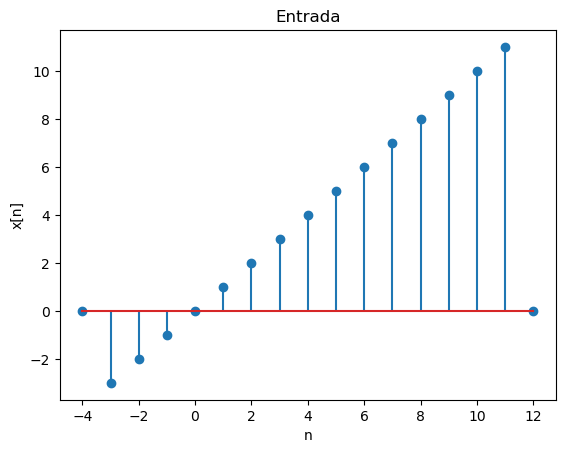

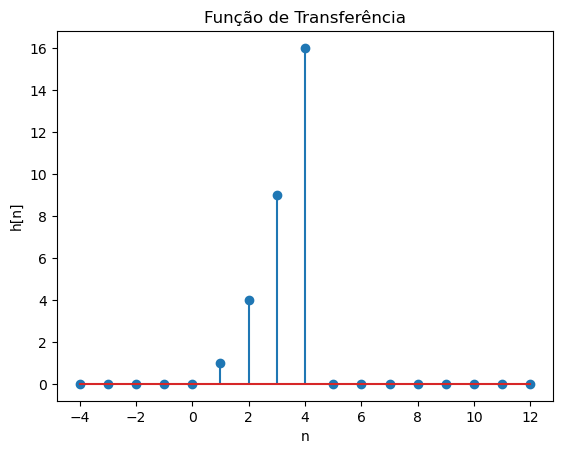

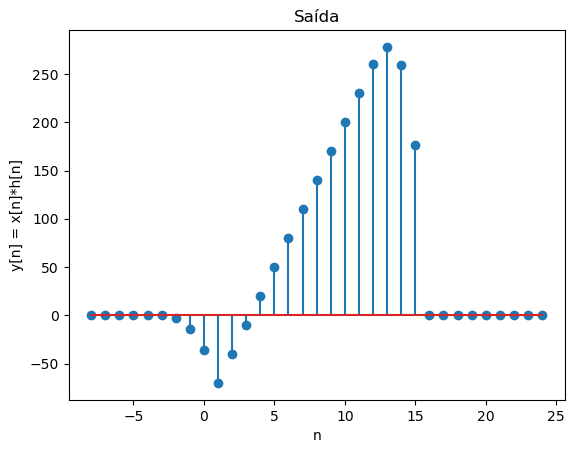

In [31]:
n = np.arange(-4, 13)
##
x = n*(np.heaviside(n+3, 1) - np.heaviside(n-12, 1))
DSP.plot([x, n], "Entrada", yl="x[n]")
##
h = n*(n*(np.heaviside(n, 1) - np.heaviside(n-5, 1)))
DSP.plot([h, n], "Função de Transferência", yl="h[n]")
##
[y, ny] = DSP.conv_m(x, n, h, n)
DSP.plot([y, ny], "Saída", yl="y[n] = x[n]*h[n]")

# 3)
$$
y[n] = y[n-1] - 0.5y[n-2] + x[n] - 0.5x[n-1]
\newline
y[n] - y[n-1] + 0.5y[n-2] = x[n] - 0.5x[n-1]
$$

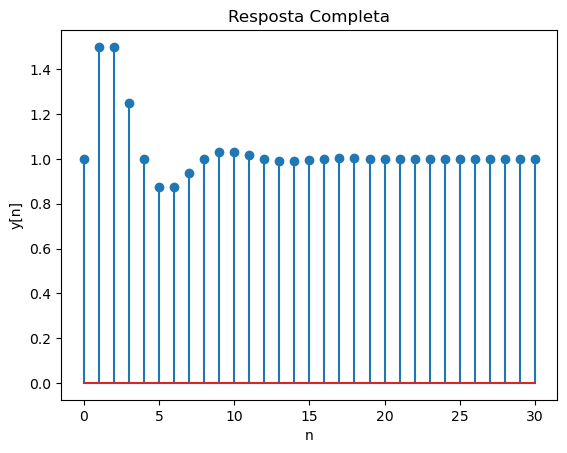

In [5]:
a = [1, -1, 0.5]
b = [1, -0.5]
##
n = np.arange(0, 31)
x = np.heaviside(n, 1)
##
y = sp.lfilter(b, a, x)
DSP.plot([y, n], "Resposta Completa")

In [17]:
ss_vec = (np.abs((y-y[-1])) < 2e-2) # Entra regime permanete em n=11
n=-5
for i in range(0, len(ss_vec)):
    if(ss_vec[i]):
        if(n<0):
            n=i
    else:
        n=-5
    i=i+1

if(n>0):
    print("Entra em regime permanente em n = " + str(n))
else:
    print("Não entra em regime permanente")

Entra em regime permanente em n = 11


# 4)
$$
h[n] = (0.2^n + (-0.6)^{n+1})u[n]
\newline
h[n] = (0.2^n + (-0.6)\cdot(-0.6)^n)u[n]
\\~\\
H(s) = \dfrac{1}{1-0.2s} + \dfrac{-0.6}{1+0.6s}, s=-jw \\~\\
H(s) = \dfrac{1+0.6s-0.6+0.12s}{(1-0.2s)(1+0.6s)}\\~\\
H(s) = \dfrac{0.4+0.72s}{1+0.4s-0.12s^2}\\~\\
H(z) = \dfrac{0.4z^{-2}+0.72z^{-1}}{1z^{-2}+0.4z^{-1}-0.12}\\~\\
$$

<Figure size 640x480 with 0 Axes>

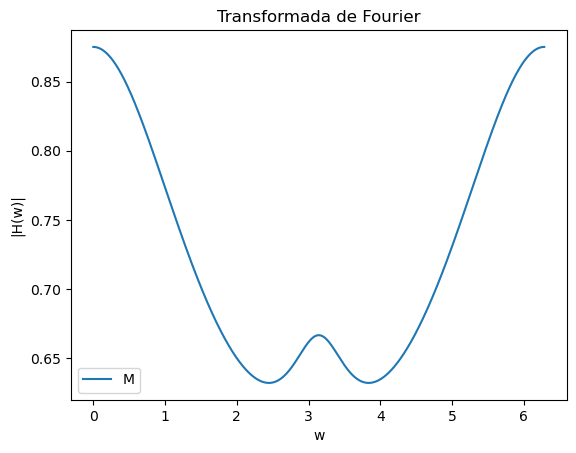

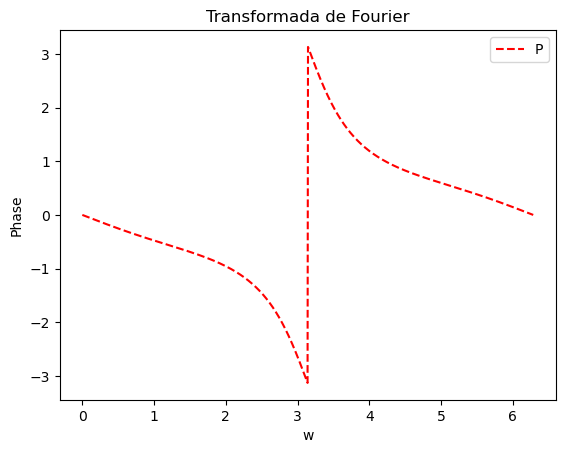

In [28]:
j = complex(0, 1)
w = np.linspace(0, 2*np.pi, 1000)
H = 1/(1-0.2*np.exp(-j*w)) - 0.6/(1+0.6*np.exp(-j*w))
DSP.Plot_Fourier([H, w], "Separate")

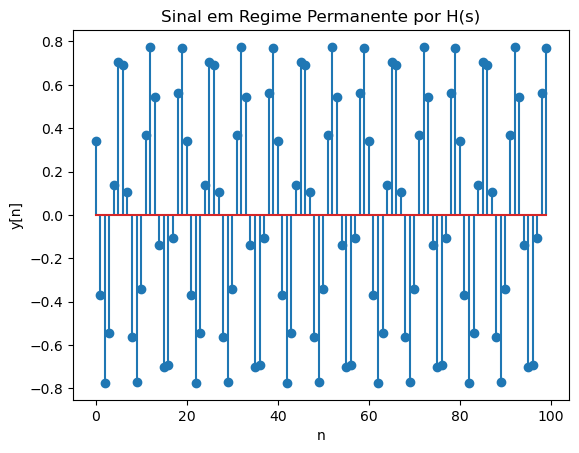

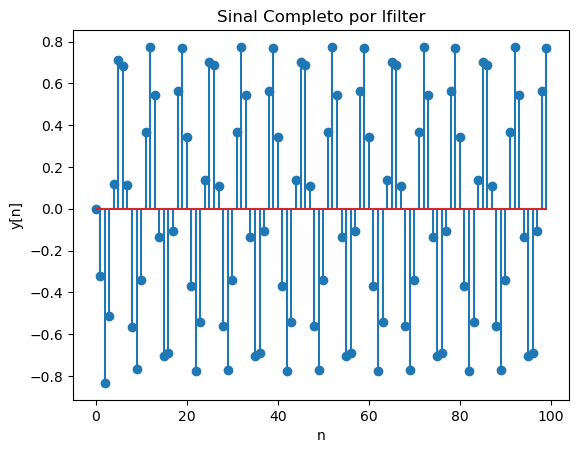

In [35]:
# Para a entrada (x)
w = 0.3*np.pi
n = np.arange(0, 100)
H = 1/(1-0.2*np.exp(-j*w)) - 0.6/(1+0.6*np.exp(-j*w))
x = np.cos(w*n + np.pi/2)
##
y = np.abs(H)*np.cos(w*n + np.pi/2 + np.angle(H))
DSP.plot([y, n], "Sinal em Regime Permanente por H(s)")
## Completo
a = [1, 0.4, -0.12]
b = [0.4, 0.72]
y = sp.lfilter(b, a, x)
DSP.plot([y, n], "Sinal Completo por lfilter")
